# Global Trend Analysis, EDA Project - Aadarsh Katiyar

## Objectives


### 1. Load the dataset and display the first few rows. How many countries does the dataset have?

In [1]:
import pandas as pd

# Load The Dataset
link = 'https://drive.google.com/uc?id=1fDGZh86UPUkt2K6enlNQfB0mswU8pB_P'
dataset = pd.read_csv(link)

# Display the first few rows of Dataset
print(dataset.head())

count_countries = dataset['country'].nunique()
print("\n")
print(f"There are {count_countries} countries in the dataset")

       country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106


There are 142 countries in the dataset


### 2. Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [2]:
# Create a Pivot table

pivot_table = dataset.pivot_table(
    index = 'continent',
    columns = 'year',
    values = 'life_exp',
    aggfunc = 'mean'            # For doing an average
) 

print(pivot_table)
print("\n")

year            1952       1957       1962       1967       1972       1977  \
continent                                                                     
Africa     39.135500  41.266346  43.319442  45.334538  47.450942  49.580423   
Americas   53.279840  55.960280  58.398760  60.410920  62.394920  64.391560   
Asia       46.314394  49.318544  51.563223  54.663640  57.319269  59.610556   
Europe     64.408500  66.703067  68.539233  69.737600  70.775033  71.937767   
Oceania    69.255000  70.295000  71.085000  71.310000  71.910000  72.855000   

year            1982       1987       1992       1997       2002       2007  
continent                                                                    
Africa     51.592865  53.344788  53.629577  53.598269  53.325231  54.806038  
Americas   66.228840  68.090720  69.568360  71.150480  72.422040  73.608120  
Asia       62.617939  64.851182  66.537212  68.020515  69.233879  70.728485  
Europe     72.806400  73.642167  74.440100  75.505167  7

### 3. Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [3]:
# To calculate it first we have to apply filter for the year 2007

year2007 = dataset[dataset['year'] == 2007]

# 75th Percentile of GDP per capita 
gdp75_percentile = year2007['gdp_cap'].quantile(0.75)

# Countries higher than the 75th Percentile 
higher_gdp_countries = year2007[year2007['gdp_cap'] > gdp75_percentile]['country']

print(f"The countries had a GDP per capita higher than the 75th Percentile in 2007 are: \n")
print(higher_gdp_countries.tolist())

print("\n")

The countries had a GDP per capita higher than the 75th Percentile in 2007 are: 

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico', 'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom', 'United States']




### 4. Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [4]:
# Defining the bins
bins__ = ["Low", "Medium", "High", "Very High"]

# Create the Life_Exp_Range column by categorizing the "life_exp"

dataset['Life_Exp_Range'] = pd.cut(
    dataset['life_exp'],
    bins = 4,
    labels = bins__
)

# Print the result to see the new column 'Life_Exp_Range'.
#dataset[['life_exp', 'Life_Exp_Range']].head()
dataset[['life_exp', 'Life_Exp_Range']].tail()

,life_exp,Life_Exp_Range
1699,62.351,High
1700,60.377,High
1701,46.809,Medium
1702,39.989,Medium
1703,43.487,Medium


### 5. Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

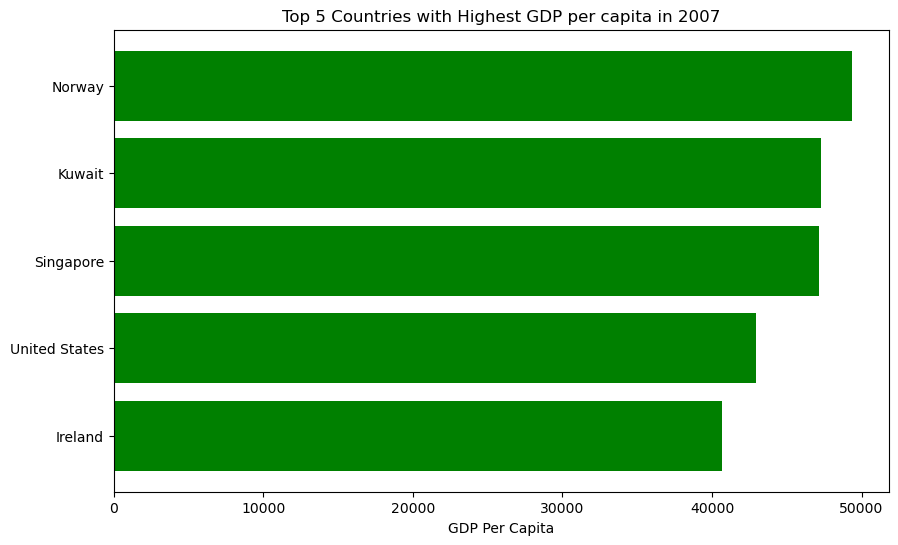

In [5]:
import matplotlib.pyplot as plt

# Sort the GDP per capita in descending order and select the top 5 Countries for the year 2007

top5_countries = year2007.sort_values(by = 'gdp_cap', ascending = False).head(5) 

# Process for creating Horizontal Chart
plt.figure(figsize = (10, 6))
plt.barh(top5_countries['country'], top5_countries['gdp_cap'], color = 'green')
plt.xlabel('GDP Per Capita')
plt.title('Top 5 Countries with Highest GDP per capita in 2007')
plt.gca().invert_yaxis()       # 
plt.show()

### 6. Find all country names that start with "I" and end with "a" using regex.

In [6]:
# Define the regex pattern

pattern = r'^I.*a$'

# Get Unique Countries
countries = dataset['country'].unique()

# Filter the country names using regex pattern that starts with 'I' and ends with 'a'
filtered_countries = [country for country in countries if pd.Series(country).str.contains(pattern, regex=True).any()]

print(f"The country which are having names starting with 'I' and ending with 'a' are:\n{filtered_countries}")

The country which are having names starting with 'I' and ending with 'a' are:
['India', 'Indonesia']


### 7. Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

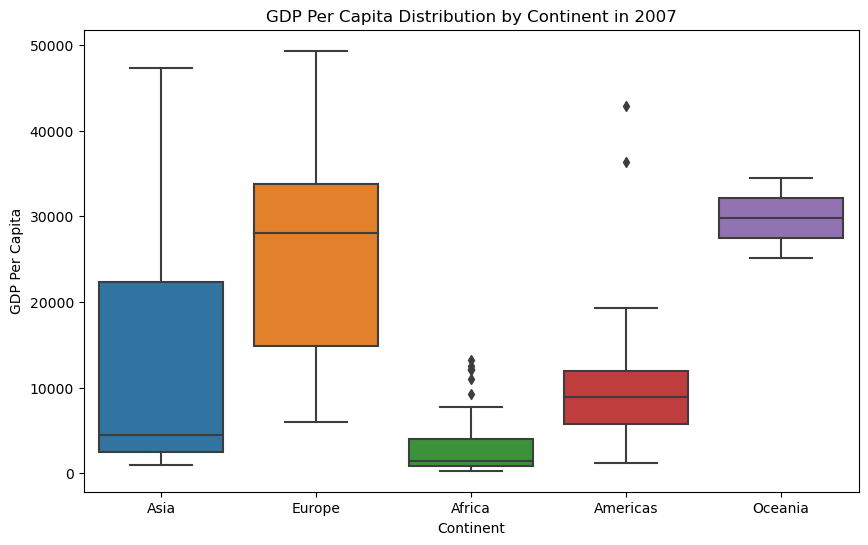

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the filtered data for 2007
# Create the chart

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'continent', y = 'gdp_cap', data= year2007)
plt.title('GDP Per Capita Distribution by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP Per Capita')
plt.show()

### 8. Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [8]:
# Filter for the countries with life expectancy over 80 years
high_life_expectancy = year2007[year2007['life_exp'] > 80]

# Selecting the columns in the output: 'Country' and 'Continent'
result = high_life_expectancy[['country', 'continent']]

print(f"Countries with a life expectancy of over 80 years in 2007 are: \n \n{result}")

Countries with a life expectancy of over 80 years in 2007 are: 
 
               country continent
71           Australia   Oceania
251             Canada  Americas
539             France    Europe
671   Hong Kong, China      Asia
695            Iceland    Europe
767             Israel      Asia
779              Italy    Europe
803              Japan      Asia
1103       New Zealand   Oceania
1151            Norway    Europe
1427             Spain    Europe
1475            Sweden    Europe
1487       Switzerland    Europe


### 9. Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).


In [9]:
# Convert the year column into datetime type
dataset['year'] = pd.to_datetime(dataset['year'], format = '%Y')

# Extract decade and create a new decade column 
dataset['Decade'] = ((dataset['year'].dt.year // 10) * 10).astype(str) + 's'

dataset[['year', 'Decade']].head()

,year,Decade
0,1952-01-01,1950s
1,1957-01-01,1950s
2,1962-01-01,1960s
3,1967-01-01,1960s
4,1972-01-01,1970s


### 10. Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

	Correlation Matrix
             gdp_cap  life_exp  population
gdp_cap     1.000000  0.583706   -0.025600
life_exp    0.583706  1.000000    0.064955
population -0.025600  0.064955    1.000000


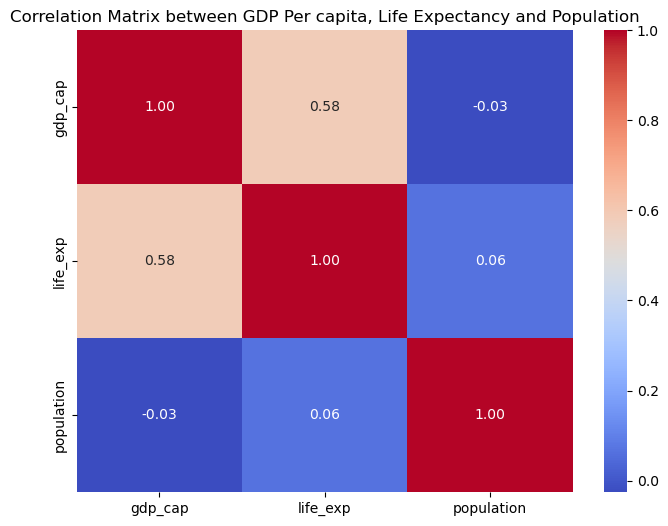

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns - GDP per capita, life expectancy, and population
data = dataset[['gdp_cap', 'life_exp', 'population']]

# Correlation Matrix
correlation_matrix = data.corr()

print("\tCorrelation Matrix")
print(correlation_matrix)


# Choosing heatmap for visualizing the correlation matrix
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix between GDP Per capita, Life Expectancy and Population')
plt.show()

### 11. How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend. Subjective Question: Discuss the various reasons that could have contributed to the change.


   year   life_exp
0  1952  49.057620
1  1957  51.507401
2  1962  53.609249
3  1967  55.678290
4  1972  57.647386


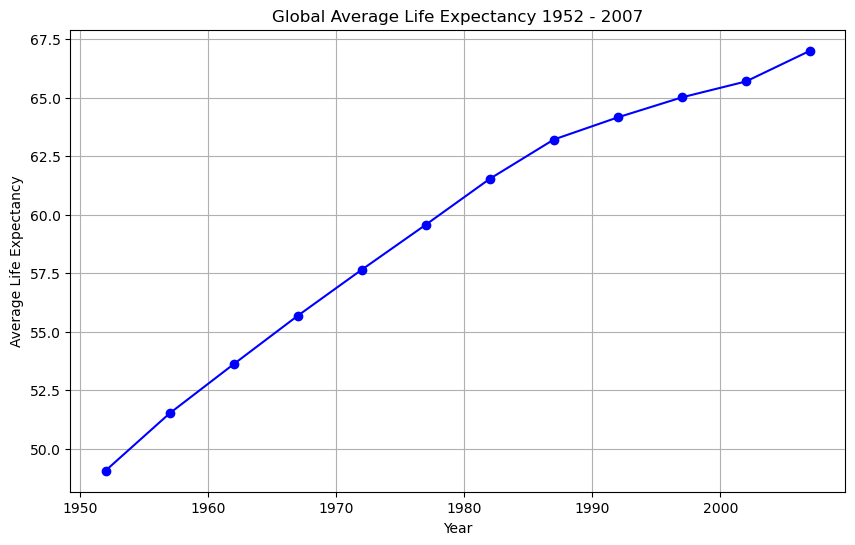

In [11]:
# Convert the 'year' column to datetime type 

dataset['year'] = pd.to_datetime(dataset['year'], format = '%Y')

# Extract year as an Integer
dataset['year'] = dataset['year'].dt.year

# Filter the data from 1952 to 2007

filtered_data = dataset[(dataset['year'] >= 1952) & (dataset['year'] <= 2007)]

# Group by the year and calculate the global average life expectancy
global_life_exp = filtered_data.groupby('year')['life_exp'].mean().reset_index()

print(global_life_exp.head())


# PLOT A LINE GRAPH
plt.figure(figsize = (10, 6))
plt.plot(global_life_exp['year'], global_life_exp['life_exp'], marker = 'o', color = 'blue')
plt.title('Global Average Life Expectancy 1952 - 2007')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()

#### Reasons behind the change 
##### The line graph of Global Life Expectancy from 1952 to 2007 shows a steady increase, reflecting significant improvements in health and living standards worldwide.


* <b>Education - </b>As it is witnessed, a rise in female education, which has been linked to better health. The more highly educated a person is, the more likely they are practice healthy lifestyle habits, have requested medical care, and given birth to a fewer children.
* <b>Globalization coupled with technological advancements -</b> The speed at which information and technology exchange happens accross borders has helped speed the rate of medical knowledge.
* <b>International help and development programs -</b> The majority of low-income nations have received international help and development projects aimed at health improvement. Those activities have placed sources of healthcare, disease prevention and infrastructure enhancement.
* <b>Economic Growth - </b>Through economic growth, standards of living have improved, nourishment taken into bodies is more adequate, better health is accessed. As nations industrialize and urbanize, the level of incomes normally rise with improved levels of education, healthcare and levels of living at large.
* <b>Better Public Health Systems -</b> Improved public health infrastructure in the form of better sanitation, clean water supply, and better waste management did help arrest, to a large extent the cases of infectious diseases. Vigorous public health campaigns for hygiene, vaccination, and healthy living have contributed much to improving the expectancy of life.

##### The overall result of these factors on global average life expectancy from 1952 to 2007 reflects the powers of changes that concerted efforts in healthcare, education and economic development can bring to human longevity.

### 12. For the year 2007, analyze the relationship between life expectancy and GDP per capita. Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.


        country  year  population continent  life_exp       gdp_cap
11  Afghanistan  2007    31889923      Asia    43.828    974.580338
23      Albania  2007     3600523    Europe    76.423   5937.029526
35      Algeria  2007    33333216    Africa    72.301   6223.367465
47       Angola  2007    12420476    Africa    42.731   4797.231267
59    Argentina  2007    40301927  Americas    75.320  12779.379640


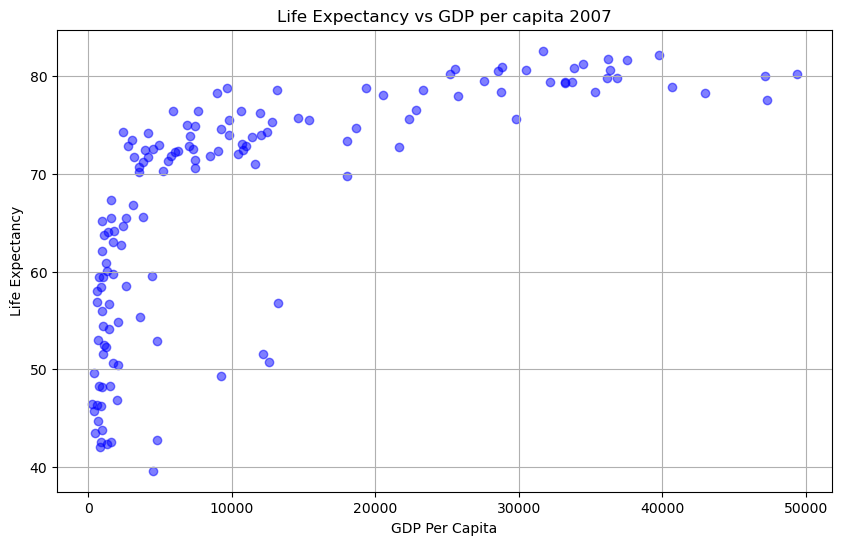

In [12]:
import matplotlib.pyplot as plt

# I have used already created filtered variable 'year2007' for 2007 filter in the data
print(year2007.head())

# Scatter plot for life expectancy and GDP per capita
plt.figure(figsize = (10, 6))
plt.scatter(year2007['gdp_cap'], year2007['life_exp'], color = 'blue', alpha = 0.5)
plt.title('Life Expectancy vs GDP per capita 2007')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### The scatter plot of Life Expectancy vs GDP per capita for 2007 largely shows a positive trend, hence high GDP per capita states have a corresponding high life expectancy. 

### 13. Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison. Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?


        country  year  population continent  life_exp       gdp_cap
11  Afghanistan  2007    31889923      Asia    43.828    974.580338
23      Albania  2007     3600523    Europe    76.423   5937.029526
35      Algeria  2007    33333216    Africa    72.301   6223.367465
47       Angola  2007    12420476    Africa    42.731   4797.231267
59    Argentina  2007    40301927  Americas    75.320  12779.379640


Average GDP per capita for each continent is 

  continent       gdp_cap
0    Africa   3089.032605
1  Americas  11003.031625
2      Asia  12473.026870
3    Europe  25054.481636
4   Oceania  29810.188275


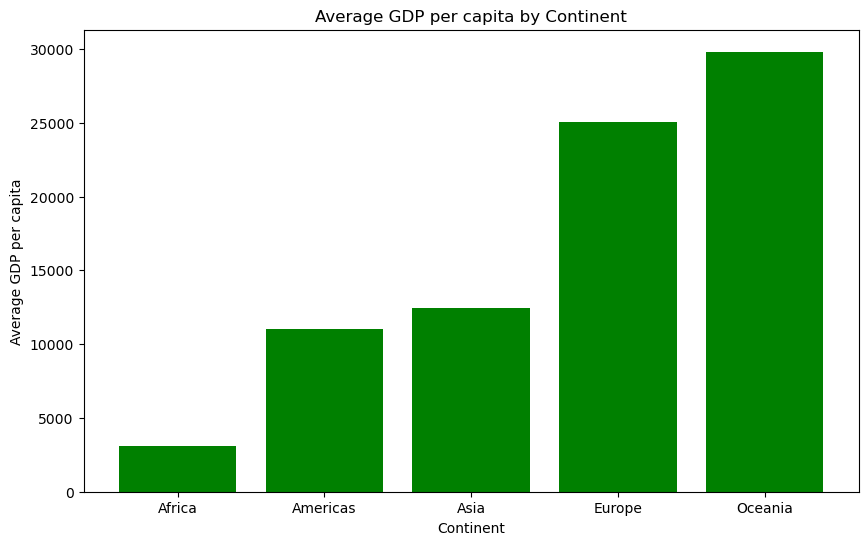

In [13]:
# Filter for the year 2007

print(year2007.head())
print('\n')

# Average GDP per capita for each continent
avg_gdp = year2007.groupby('continent')['gdp_cap'].mean().reset_index()
print(f"Average GDP per capita for each continent is \n\n{avg_gdp}")

# Bar chart to compare the average GDP per capita for each continent
plt.figure(figsize = (10, 6))
plt.bar(avg_gdp['continent'], avg_gdp['gdp_cap'], color = 'green')
plt.title('Average GDP per capita by Continent')
plt.xlabel('Continent')
plt.ylabel('Average GDP per capita')
plt.show()

#### In the bar chart, it is clearly visible that Oceania has a higher average GDP per capita compared to the America, despite the America having more countries. There can be multiple factors related to it:

* <b>Composition of Countries in Oceania -</b> Oceania primarily consists of Australia and New Zealand, which are highly developed, high-income countries with strong economies. These two countries have a significant impact on the average GDP per capita for the entire continent, as there are few countries in Oceania.
* <b>Population Distribution -</b> In Oceania, Australia and New Zealand have relatively small populations compared to large countries like the United States and Brazil. However, their high GDPs result in a high GDP per capita. In contrast, the America have more diverse population distribution, with large populations in countries that might have lower GDP per capita.
* <b>Resource Wealth and Economic Policies -</b> Australia, in particular, benefits from abundant natural resources and effective economic policies, which contribute to its high GDP per capita. The economic stability and prosperity of Oceania's key countries significantly influence the continent's overall average GDP per capita.
* <b>Economic Diversity in America -</b> The America include a wide range of countries with varying levels of economic development. For example, United States and Canada are highly developed countries with high GDP per capita, but many countries in Central and South America have lower GDP per capita. This economic diversity lowers the average GDP per capita for the America.

#### This comparison illustrates how the economic performance of a few key countries can significantly impact the overall average for a continent, regardless of the number of countries it contains.

### 14. Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided. 
### Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries. Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.
### Subjective Question: What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.


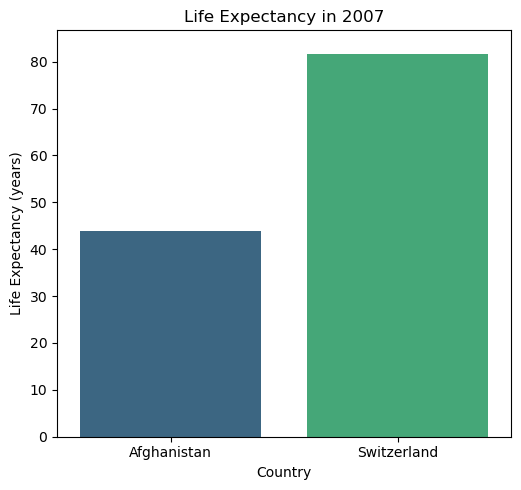

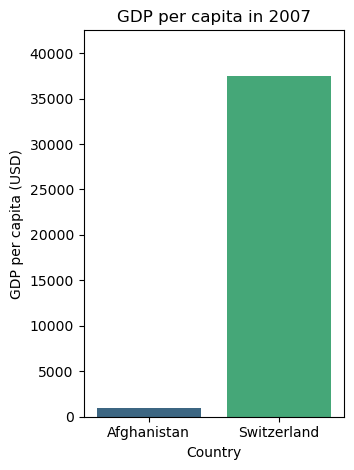

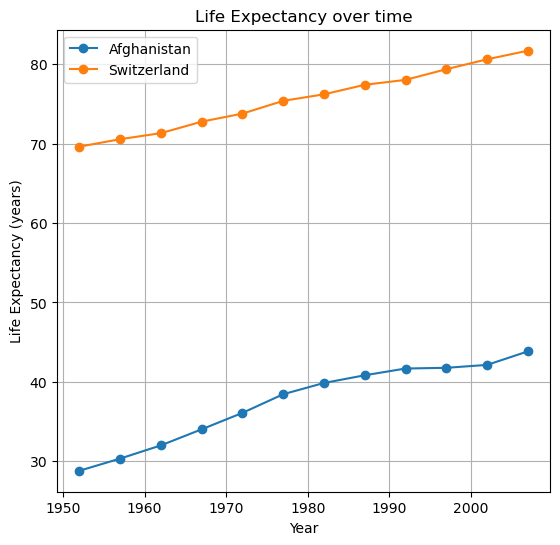

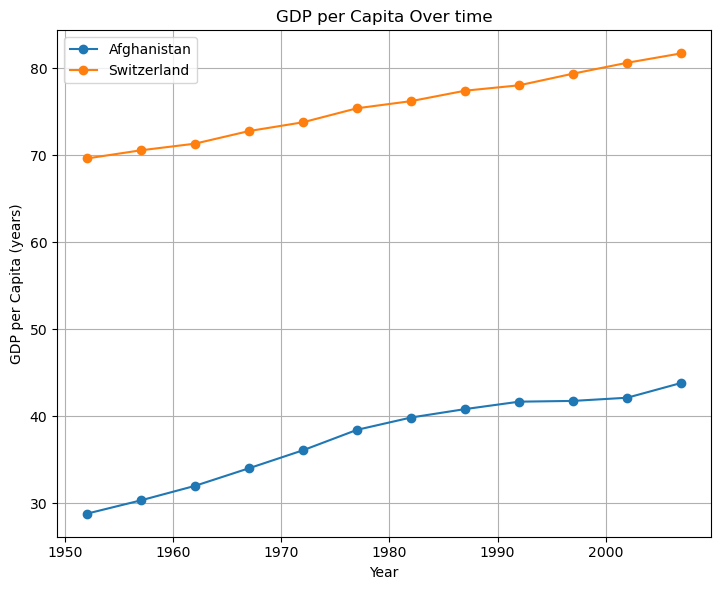

In [17]:
# Step 1: Filter the dataset for Afghanistan and Switzerland

# Filter the data for Afghanistan and Switzerland
afghanistan = dataset[dataset['country'] == 'Afghanistan']
switzerland = dataset[dataset['country'] == 'Switzerland']

# Now filter the data for 2007 
afghanistan_2007 = year2007[year2007['country'] == 'Afghanistan']
switzerland_2007 = year2007[year2007['country'] == 'Switzerland']

# Step 2: Create a Bar chart for 2007

# Data for the bar chart
countries = ['Afghanistan', 'Switzerland']
life_expectancy = [afghanistan_2007['life_exp'].values[0], switzerland_2007['life_exp'].values[0]]
gdp_per_capita = [afghanistan_2007['gdp_cap'].values[0], switzerland_2007['gdp_cap'].values[0]]

# Creating a Bar charts

# Bar chart for the Life Expectancy
plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x = countries, y = life_expectancy, palette= 'viridis')
plt.title('Life Expectancy in 2007')
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Country')
plt.ylim(0, max(life_expectancy) + 5)
plt.tight_layout()
plt.show()
# Bar chart for GDP per capita
plt.subplot(1, 2, 1)
sns.barplot(x=countries, y =gdp_per_capita, palette = 'viridis')
plt.title('GDP per capita in 2007')
plt.xlabel('Country')
plt.ylabel('GDP per capita (USD)')
plt.ylim(0, max(gdp_per_capita) + 5000)

plt.tight_layout()
plt.show()
# Step 3: Create a Line graph for the trends over time

# Line graph for Life Expectancy over time
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(afghanistan['year'], afghanistan['life_exp'], label = 'Afghanistan', marker = 'o')
plt.plot(switzerland['year'], switzerland['life_exp'], label = 'Switzerland', marker = 'o')
plt.title('Life Expectancy over time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.legend()

# Line graph for GDP per capita over time
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(afghanistan['year'], afghanistan['life_exp'], label = 'Afghanistan', marker = 'o')
plt.plot(switzerland['year'], switzerland['life_exp'], label = 'Switzerland', marker = 'o')
plt.title('GDP per Capita Over time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (years)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Differences in Life Expectancy and Economic Development
### 1. Life Expectancy
* <b> Switzerland: </b> In the year 2007, Switzerland showed an incredibly high life expectancy at approximately 82.6 Years. Life expectancy, over the years, has been increasing constantly in Switzerland and depicts it as a nation with a very well-established health care system with good living standards and overall stability.

* <b> Afghanistan: </b> In 2007, Afghanistan had a life expectancy of approximately 43.8 years. The trend overtime shows ups and downs, flatness, or even reversal. This reflects the numerous pains the nation has been passing through, comprising of inferior healthcare and deplorable living standards.

### 2. Economic Development: GDP Per Capita
* <b> Switzerland: </b> In 2007, the GDP per capita of Switzerland was roughly $ 37,687.7 showing the strong and wealthy economy of the country. During all these years, the continuous increasing GDP per capita shows that the country has economic stabily, growth and high productivity and innovation.

* <b> Afghanistan: </b> Afghanistan's GDP per capita in 2007 was only about $603.0. The growth over time has been modest, pointing out the struggles of the country with economic development due to instability, conflict and limited infrastructure. 

## Influence of stability or instability on Key Metrics
### 1. Stability in Switzerland
* <b>Political and Economic Stability: </b>  The stable government, strong institutions, and peaceful environment of Switzerland have given way to continuous economic growth and a high life expectancy. This stability accommodates long-term planning, investing in health and education and building robust systems of economics.
  
* <b>Healthcare and Living Standards: </b> Stability allows for constant betterment in healthcare. This leads to an increased life expectancy rate. This combined with access to education and technology, results in high standards of living that further improve health and increase the prospect of economic prosperity.

### 2. Instability in Afghanistan:
* <b>Conflict Impact: </b> The history of Afghanistan has been characterized by conflict and political instability, which has shaken the economic development and health outcomes of the country to their core. Indeed, war disrupts infrastructure, health care, and economic activities, hence resulting in lower life expectancy and poor economic performance.

* <b>Challenges to Development: </b> Instability makes it very difficult to maintain and build up services in both the health and education sectors. Economic activities are regularly interrupted, leading to decreased GDP per capita. The lack of sustained governance and security also becomes a gigantic barrier to investment and development in the long term.

## Inferences from the Data
* <b>Life Expectancy: </b> There is an apparent connection between data on stability and life expectancy. In that regard, the Swiss citizens have been able to live a lot longer and healthier due to their more stable environment. Afghanistan, at the other extreme, was plagued with much reduced life expectancy against the backdrop of ongoing instability and lack of appropriate healthcare facilities.

* <b>Economic Development: </b> It has a strong relation with stability, proxied by GDP per capita. Switzerland's case is a very good example of how the stable political and economic environment the country had nurtured it into becoming one of the wealthiest countries in the world. The low GDP per capita fo Afghanistan mirrors just the exact economic challenges that accompany its successive years of instability
* <b>Overall Analysis: </b> Stability contributes a lot to improved life expectancy and economic development. It is only in stable countries that they are able to afford to make investments in health, education, and infrastructure and therefore record high life expectancy and GDP per capita. In contrast, instability cultivates a cycle of poverty and poor health outcomes, of which the case in Afghanistan is an example.